In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_excel('exam_results.xlsx')
data

,Student Code,Surname,Forename 1,Programme,Degree,Quantum Mechanics,Relativity,Waves,Lab work,Unnamed: 9,Tutor group
0,2103,Lemarr,Charlesetta,Physics,MSci,54,86.0,45.0,55,NaN,1
1,2104,Narron,Elliot,Physics,MSci,72,79.0,63.0,43,NaN,1
2,2105,Seevers,Josue,Physics,BSc,57,90.0,45.0,61,NaN,1
3,2106,Mcpeak,Xochitl,Physics,MSci,48,82.0,45.0,94,NaN,1
4,2107,Devall,Lorene,Physics,BSc,70,87.0,43.0,47,NaN,1
5,2108,Morningstar,Elfreda,Physics,MSci,97,99.0,83.0,66,NaN,1
6,2109,Heston,Klara,Physics,BSc,72,49.0,43.0,45,NaN,1
7,2110,Mormon,Charley,Physics,BSc,76,76.0,53.0,98,NaN,2
8,2111,Villegas,Alethea,Physics,BSc,85,91.0,55.0,65,NaN,2
9,2112,Hoar,Laine,Physics,BSc,89,85.0,40.0,87,NaN,2


In [10]:
#top student
#Q1 You need to give prizes to the five students taking Physics with the top mean marks over all four modules. 
#Which students get the prizes

data['mean'] = data[['Quantum Mechanics','Lab work','Relativity','Waves']].mean(1,skipna=False)
print(data[data['Programme']=='Physics'].sort_values('mean',ascending=False).head(5))

    Student Code      Surname Forename 1 Programme Degree  Quantum Mechanics  \
66          2169      Helberg  Alexandra   Physics    BSc                 87   
5           2108  Morningstar    Elfreda   Physics   MSci                 97   
22          2125       Paneto     Ayesha   Physics    BSc                 85   
15          2118        Revel   Susannah   Physics    BSc                 87   
32          2135     Bouchard        Joe   Physics   MSci                 93   

    Relativity  Waves  Lab work  Unnamed: 9  Tutor group   mean  
66        97.0   76.0        91         NaN           12  87.75  
5         99.0   83.0        66         NaN            1  86.25  
22        79.0   80.0        94         NaN            4  84.50  
15        89.0   79.0        83         NaN            3  84.50  
32       101.0   81.0        62         NaN            6  84.25  


In [11]:
# Q2 The staff member running the tutor group with the highest mean mark gets a beer. Which group's tutor gets the beer?
print(data.groupby('Tutor group').mean().sort_values('mean',ascending=False).head())

             Student Code  Quantum Mechanics  Relativity      Waves  \
Tutor group                                                           
12                 2171.5          61.333333   82.333333  54.333333   
3                  2118.5          66.333333   73.666667  54.500000   
4                  2124.5          71.000000   78.333333  60.000000   
14                 2183.5          64.166667   86.500000  48.833333   
6                  2137.5          59.666667   78.166667  53.333333   

              Lab work  Unnamed: 9       mean  
Tutor group                                    
12           74.333333         NaN  68.083333  
3            76.833333         NaN  67.833333  
4            61.666667         NaN  67.750000  
14           69.666667         NaN  67.291667  
6            77.333333         NaN  67.125000  


In [12]:
Quantum_M = data['Quantum Mechanics'].mean()

62.31730769230769

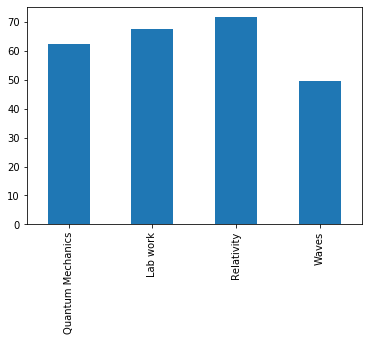

In [21]:
#Q3 You need to report the mean mark for each course to the faculty. 
#List the four courses by order of mean mark. Plot these on a bar chart so they can understand it
data1 = data[['Quantum Mechanics','Lab work','Relativity','Waves']].mean()
data1.plot(kind= 'bar')

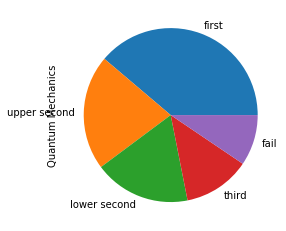

In [28]:
#Q4 Scores above 70% are a 'first'. Scores between 60 and 69% are an 'upper second', between 50 and 59% a 'lower second', 
#between 40 and 49% a 'third', and 39% and below is a fail. For Quantum Mechanics, 
#plot a pie chart showing the number of students who fall in each of these categories.

bins = [0, 40, 50, 60, 70, 100]
labels = ['fail', 'third', 'lower second', 'upper second', 'first']
pd.cut(data['Quantum Mechanics'], bins, labels=labels).value_counts().plot(kind = 'pie')
plt.show()

In [30]:
#Q5 Students on the Physics programme pass the year if they score more than 40% on three out of four modules. 
#Otherwise they fail. How many students failed? Loop through the failing students, 
#printing out a personalised statement (imagine that you will code it so Python emails it to them) telling them they've failed.
for index, row in data[data['Programme']=='Physics'].iterrows():
    courses_passed = 0
    if row['Quantum Mechanics'] >= 40:
        courses_passed += 1
    if row['Lab work'] >= 40:
        courses_passed += 1
    if row['Relativity'] >= 40:
        courses_passed += 1
    if row['Waves'] >= 40:
        courses_passed += 1
    if courses_passed < 4:
        print("Dear " + row['Forename 1'] + ". You have failed.")
    

Dear Meagan. You have failed.
Dear Gerda. You have failed.
Dear Matthew. You have failed.
Dear Buford. You have failed.
Dear Londa. You have failed.
Dear Zona. You have failed.
Dear Zita. You have failed.
Dear Rhett. You have failed.
Dear Hulda. You have failed.
Dear Rocco. You have failed.
Dear Melva. You have failed.
Dear Renato. You have failed.
Dear Zella. You have failed.
Dear Anderson. You have failed.
Dear Royce. You have failed.
Dear Marlen. You have failed.
Dear Wai. You have failed.
Dear Ramiro. You have failed.
Dear Tammy. You have failed.
Dear Carmelina. You have failed.
Dear Palmira. You have failed.
Dear Anisa. You have failed.
Dear Benedict. You have failed.
Dear Arianne. You have failed.
Dear Jamal. You have failed.
Dear Jen. You have failed.
Dear Heide. You have failed.
Dear Vincenzo. You have failed.
Dear Rosie. You have failed.
Dear Lang. You have failed.
Dear Moses. You have failed.


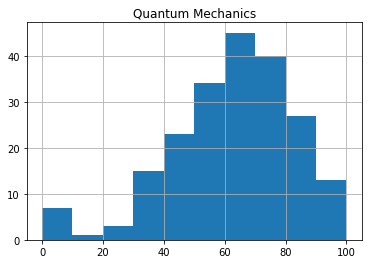

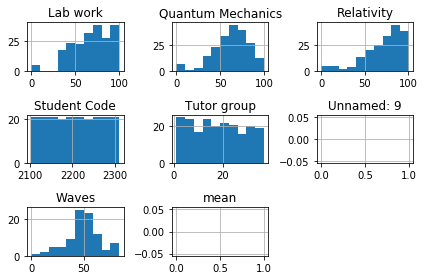

In [34]:
#Q6 Rumour has it the scores for Lab Work have been made up. Create a scatter matrix for the four courses. 
#What does this tell you?
data.hist('Quantum Mechanics')
plt.show()
data.hist()
plt.tight_layout()
plt.show()